<a href="https://colab.research.google.com/github/shawakash/Ml-Projects/blob/Pytorch/02_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [280]:
# Datasets - Toy Datasets

import sklearn
from sklearn.datasets import make_circles

# Samples
n_samples = 1000

# Sets
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

len(X), len(y)

(1000, 1000)

In [281]:
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [282]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "y": y})

circles.head(10)

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


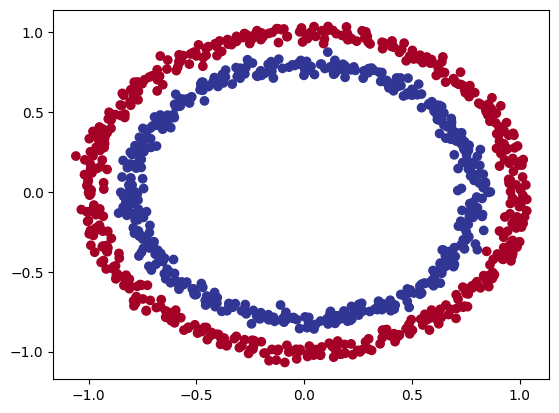

In [283]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [284]:
# Input and Output shapes

X.shape, y.shape

((1000, 2), (1000,))

In [285]:
X_sample = X[0]
y_sample = y[0]
X_sample, X_sample.shape, y_sample, y_sample.shape

(array([0.75424625, 0.23148074]), (2,), 1, ())

In [286]:
# Turning Datasets to tensor and train and test splits
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [287]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [288]:
# Spliting Dataset Randomly
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

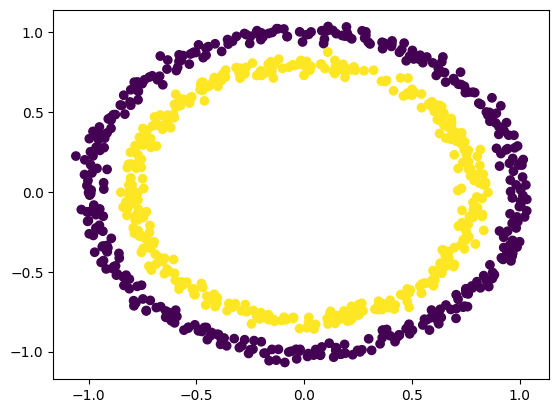

In [289]:
plt.scatter(X_train[:,0],
            X_train[:,1],
            c=y_train)

In [290]:
# Making Device Agnostic Code
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [291]:
# Model

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__();

    self.layer_1 = nn.Linear(in_features=2,
                                  out_features=10)

    self.layer_2 = nn.Linear(in_features=10,
                                  out_features=1)

    # self.layer_seq = nn.Sequential(
    #     nn.Linear(in_features=2,
    #               out_features=10),
    #     nn.Linear(in_features=10,
    #               out_features=1)
    # )


  def forward(self, x: torch.tensor) -> torch.tensor:
    # return self._layer_seq(x)
    return self.layer_2(self.layer_1(x))


model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)

In [292]:
# Using nn.Sequential to make models
torch.manual_seed(42)

model_1 = nn.Sequential(
    nn.Linear(in_features=2,
              out_features=16),
    nn.Linear(in_features=16,
              out_features=1)
).to(device)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): Linear(in_features=16, out_features=1, bias=True)
)

In [293]:
# Getting some untrained predictions
with torch.inference_mode():
  untrained_preds = model_1(X_test)

torch.round(untrained_preds[:5]), y_test[:5]

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]]),
 tensor([1., 0., 1., 0., 1.]))

In [294]:
#  Loss function and optimizer

# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [295]:
# Calculate Accuracy - % of correct prediction

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [296]:
model_1.eval()

with torch.inference_mode():
  y_logits = model_1(X_test)[:5]

y_logits

tensor([[0.1658],
        [0.2634],
        [0.0867],
        [0.1875],
        [0.3669]])

In [297]:
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.5414],
        [0.5655],
        [0.5217],
        [0.5467],
        [0.5907]])

In [298]:
torch.round(y_preds_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [299]:
y_preds = torch.round(y_preds_probs).squeeze()
y_preds_labels = torch.round(torch.sigmoid(model_1(X_test))[:5]).squeeze()
y_preds_labels == y_preds

tensor([True, True, True, True, True])

In [300]:
y_preds_labels, y_test[:5]

(tensor([1., 1., 1., 1., 1.], grad_fn=<SqueezeBackward0>),
 tensor([1., 0., 1., 0., 1.]))

In [301]:
# Training the model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train) #   BCELosswithLogits require y_logits as y_preds
  # But BCELoss requires loss_fn(torch.sigmoid(y_logits), y_test)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # Testing
  model_1.eval()

  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  #  Prints
  if epoch%10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.70438, Accuracy: 50.12% | Test loss: 0.70732, Test acc: 50.00%
Epoch: 10 | Loss: 0.70285, Accuracy: 51.25% | Test loss: 0.70568, Test acc: 51.00%
Epoch: 20 | Loss: 0.70153, Accuracy: 54.37% | Test loss: 0.70427, Test acc: 52.50%
Epoch: 30 | Loss: 0.70040, Accuracy: 56.50% | Test loss: 0.70305, Test acc: 55.00%
Epoch: 40 | Loss: 0.69943, Accuracy: 58.38% | Test loss: 0.70200, Test acc: 56.00%
Epoch: 50 | Loss: 0.69859, Accuracy: 59.25% | Test loss: 0.70109, Test acc: 55.50%
Epoch: 60 | Loss: 0.69787, Accuracy: 58.75% | Test loss: 0.70031, Test acc: 56.50%
Epoch: 70 | Loss: 0.69726, Accuracy: 57.38% | Test loss: 0.69963, Test acc: 54.50%
Epoch: 80 | Loss: 0.69672, Accuracy: 56.25% | Test loss: 0.69904, Test acc: 54.00%
Epoch: 90 | Loss: 0.69626, Accuracy: 54.75% | Test loss: 0.69853, Test acc: 53.00%


In [302]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("Helper function already exist :)")
else:
  print("Downloading the helper function file for you:)")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Helper function already exist :)


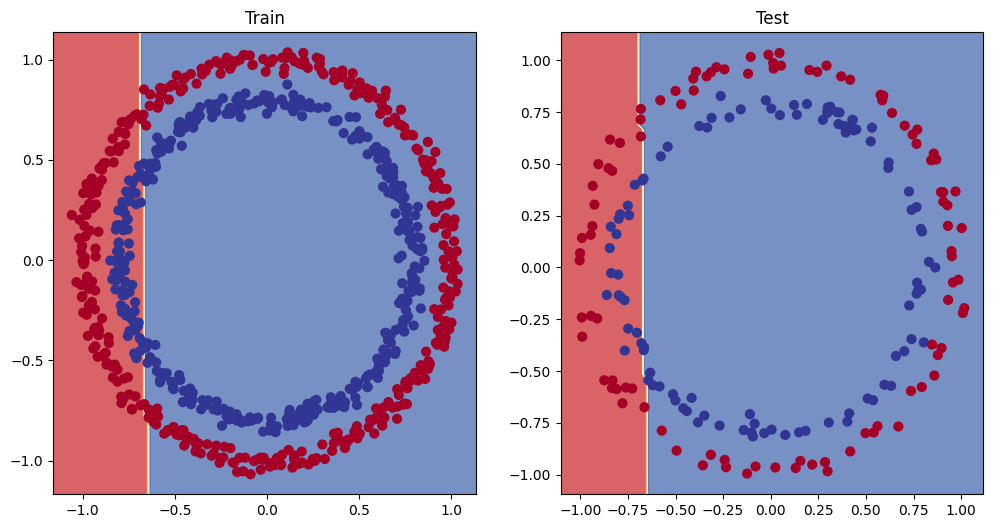

In [303]:
# Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [304]:
import torch
from torch import nn

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(2,10)
    self.layer_2 = nn.Linear(10, 10)
    self.layer_3 = nn.Linear(10, 1)

  def forward(self, x: torch.Tensor) -> torch.tensor:
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_2 = CircleModelV1().to(device)
model_2

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [305]:
# Loss function

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [306]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
  model_2.train()
  y_logits = model_2(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch%20 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69396, Accuracy: 53.87% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 20 | Loss: 0.69351, Accuracy: 53.87% | Test loss: 0.69283, Test acc: 49.50%
Epoch: 40 | Loss: 0.69329, Accuracy: 53.87% | Test loss: 0.69310, Test acc: 49.00%
Epoch: 60 | Loss: 0.69317, Accuracy: 53.87% | Test loss: 0.69336, Test acc: 51.50%
Epoch: 80 | Loss: 0.69309, Accuracy: 53.87% | Test loss: 0.69359, Test acc: 50.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 53.87% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 120 | Loss: 0.69302, Accuracy: 53.87% | Test loss: 0.69396, Test acc: 46.50%
Epoch: 140 | Loss: 0.69301, Accuracy: 53.87% | Test loss: 0.69409, Test acc: 48.00%
Epoch: 160 | Loss: 0.69300, Accuracy: 53.87% | Test loss: 0.69421, Test acc: 47.00%
Epoch: 180 | Loss: 0.69299, Accuracy: 53.87% | Test loss: 0.69430, Test acc: 46.50%
Epoch: 200 | Loss: 0.69299, Accuracy: 53.87% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 220 | Loss: 0.69298, Accuracy: 53.87% | Test loss: 0.69443, Test acc: 46.00

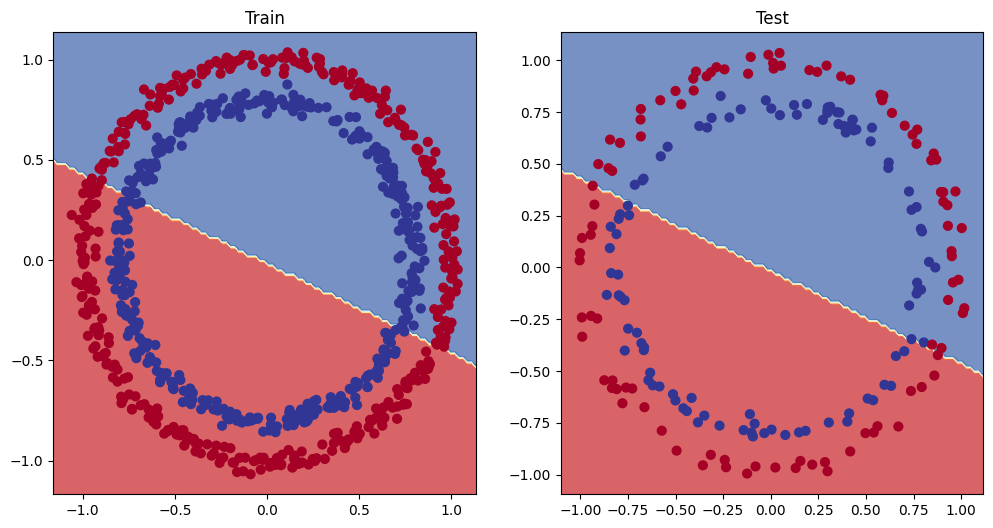

In [307]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

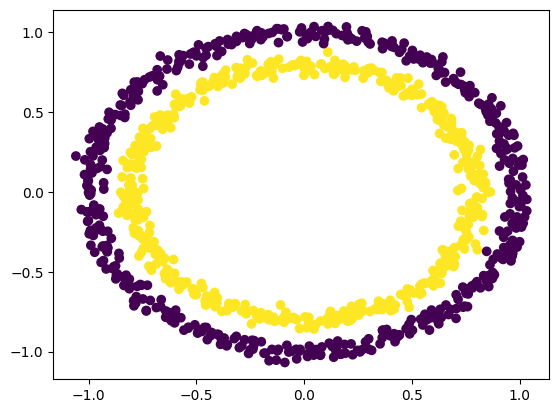

In [308]:
# Non-Linearity

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=.03,
                    random_state=42)

plt.scatter(X[:,0], X[:, 1], c=y)


In [309]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,y)

device = "cuda" if torch.cuda.is_available() else "cpu"
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

In [310]:
X_train[:5], y_train[:5]

(tensor([[ 0.0764,  0.7993],
         [ 1.0034,  0.1903],
         [ 0.2982,  0.7567],
         [ 0.1111, -0.8267],
         [-0.4069,  0.9117]]),
 tensor([1., 0., 1., 1., 0.]))

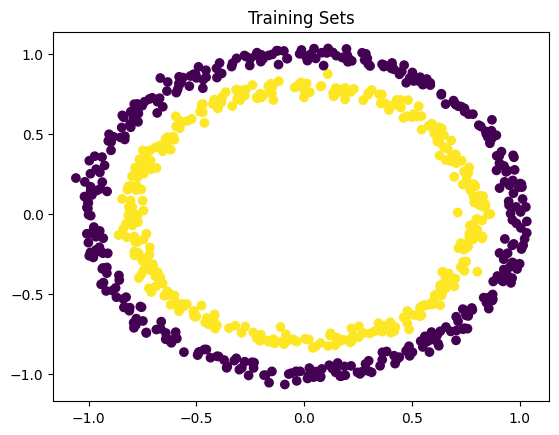

In [311]:
plt.title("Training Sets")
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)


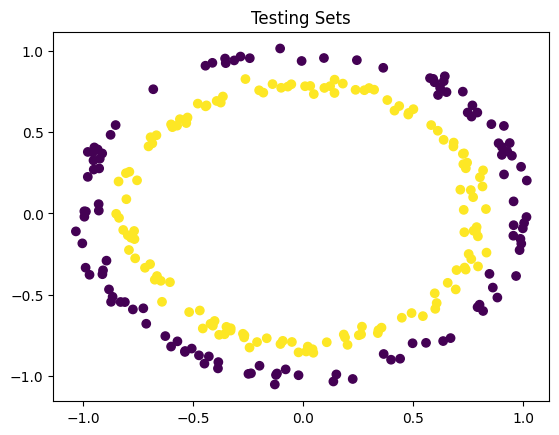

In [312]:
plt.title("Testing Sets")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)

In [318]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(2, 16)
    self.layer_2 = nn.Linear(16, 16)
    self.layer_3 = nn.Linear(16, 1)
    self.relu = nn.ReLU()

  def forward(self, x: torch.tensor) -> torch.tensor:
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [319]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

In [320]:
# Training

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if epoch%20 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69528, Accuracy: 51.47% | Test Loss: 0.70429, Test Accuracy: 45.60%
Epoch: 20 | Loss: 0.69272, Accuracy: 51.47% | Test Loss: 0.69811, Test Accuracy: 45.60%
Epoch: 40 | Loss: 0.69182, Accuracy: 51.47% | Test Loss: 0.69576, Test Accuracy: 45.60%
Epoch: 60 | Loss: 0.69115, Accuracy: 51.47% | Test Loss: 0.69449, Test Accuracy: 45.60%
Epoch: 80 | Loss: 0.69056, Accuracy: 51.47% | Test Loss: 0.69373, Test Accuracy: 45.60%
Epoch: 100 | Loss: 0.68999, Accuracy: 51.47% | Test Loss: 0.69312, Test Accuracy: 45.60%
Epoch: 120 | Loss: 0.68943, Accuracy: 51.47% | Test Loss: 0.69256, Test Accuracy: 45.60%
Epoch: 140 | Loss: 0.68885, Accuracy: 51.47% | Test Loss: 0.69200, Test Accuracy: 45.60%
Epoch: 160 | Loss: 0.68824, Accuracy: 51.47% | Test Loss: 0.69143, Test Accuracy: 45.60%
Epoch: 180 | Loss: 0.68761, Accuracy: 51.47% | Test Loss: 0.69087, Test Accuracy: 45.60%
Epoch: 200 | Loss: 0.68697, Accuracy: 51.47% | Test Loss: 0.69033, Test Accuracy: 45.60%
Epoch: 220 | Loss: 0.68629,

In [321]:
model_3.eval()

with torch.inference_mode():
  y_pred = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_pred[:5], y_test[:5]

(tensor([1., 1., 0., 0., 1.]), tensor([1., 1., 1., 0., 1.]))

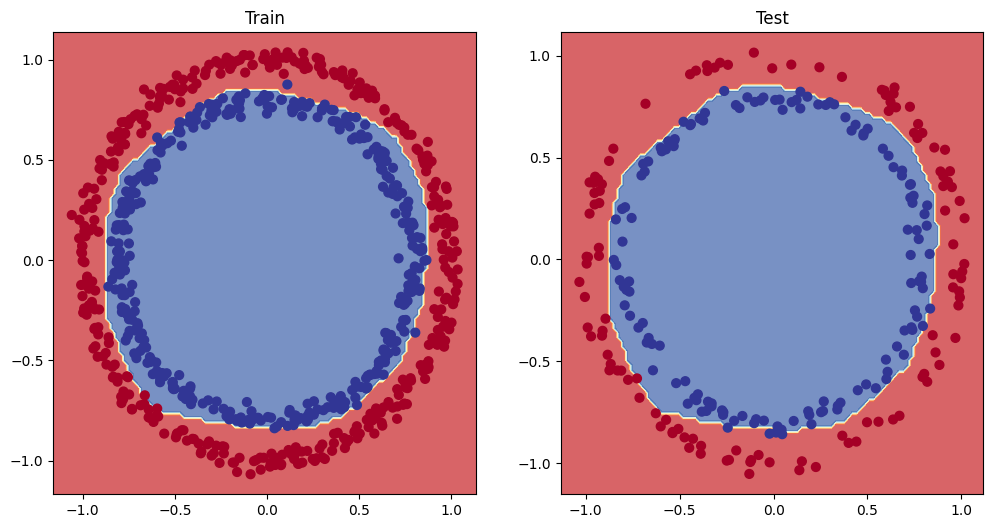

In [325]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_pred)